<a href="https://colab.research.google.com/github/shivashukla02/Netflix-Movies-and-TV-Show-Clustering-Unsupervised/blob/main/Netflix_Movies_and_TV_Show_Clustering_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Netflix Movies and TV Show Clustering(Unsupervised)
##### **Contribution**    - Shivank Shukla



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import unicodedata
import string
from wordcloud import WordCloud, STOPWORDS 
import missingno as msno 

from warnings import filterwarnings
filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
#setting the notebook.
pd.options.mode.chained_assignment = None  
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Dataset Loading

In [3]:
#Mount Drive to load data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Loading our dataset from gogle drive and creating a pandas dataframe
df_netflix = pd.read_csv('/content/drive/MyDrive/saved files/Netflix/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [5]:
#Exploring first 5 rows for better understanding of data
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
#Curiously exploring last 5 rows of dataset using tail()
df_netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count

print('\n------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_netflix.shape[0]}, Columns: {df_netflix.shape[1]}\n') 


------------------------------------Shape-------------------------------------

Rows: 7787, Columns: 12



### Dataset Information

In [8]:
# Dataset Info
print('------------------------------------Info--------------------------------------\n')
df_netflix.info()

------------------------------------Info--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df_netflix.duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print(df_netflix.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


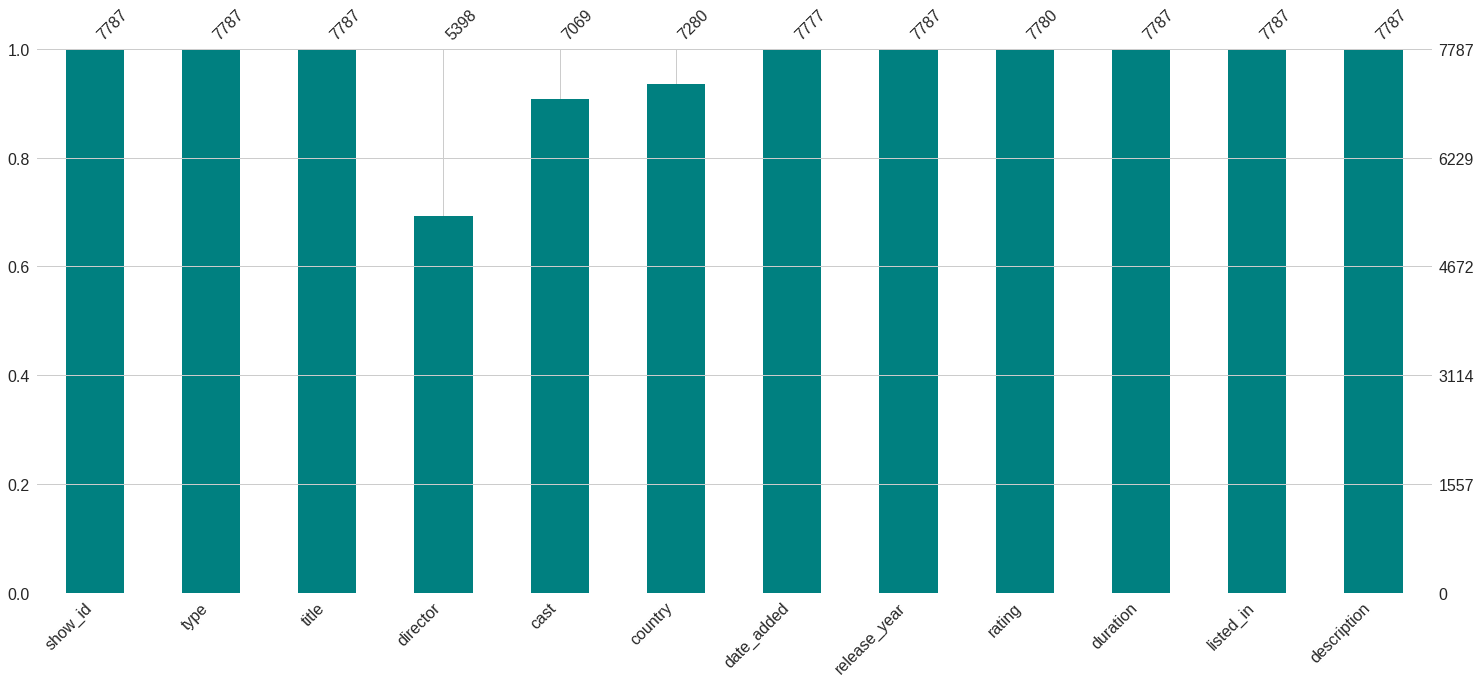

In [11]:
# Visualizing the missing values
msno.bar(df_netflix, color="Teal")

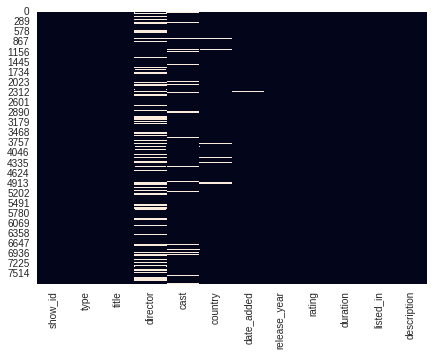

In [12]:
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df_netflix.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?



*   There are no duplicate values.
*   Director have over 2000 null values.
*   The dataset contained about 7787 records, and 12 attributes.
*   Apart from release_year which is int64 every other is object dtype.







## ***2. Understanding Your Variables***

In [13]:
# Choosing the primary country and primary genre to simplify the analysis
df_netflix['country'] = df_netflix['country'].astype('str')
df_netflix['country'] = df_netflix['country'].apply(lambda x: x.split(',')[0])
df_netflix['listed_in'] = df_netflix['listed_in'].apply(lambda x: x.split(',')[0])

In [14]:
# country in which a movie was produced
df_netflix.country.value_counts()

United States           2883
India                    956
United Kingdom           577
nan                      507
Canada                   259
Japan                    237
France                   196
South Korea              194
Spain                    168
Mexico                   123
Australia                108
Turkey                   106
Egypt                    105
Germany                   92
China                     86
Taiwan                    82
Brazil                    79
Hong Kong                 77
Indonesia                 76
Philippines               75
Nigeria                   71
Argentina                 68
Thailand                  61
Italy                     59
Colombia                  36
South Africa              35
Denmark                   30
Singapore                 28
Ireland                   26
Poland                    26
Netherlands               25
Malaysia                  23
Pakistan                  22
Chile                     21
Norway        

In [15]:
# Dataset Columns
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [16]:
# Dataset Describe
df_netflix.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7787,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,82,1565,NaN,14,216,36,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Dramas,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2883,118,NaN,2863,1608,1384,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

1.show_id : Unique ID for every Movie / Tv Show

2.type : Identifier - A Movie or TV Show

3.title : Title of the Movie / Tv Show

4.director : Director of the Movie

5.cast : Actors involved in the movie / show

6.country : Country where the movie / show was produced

7.date_added : Date it was added on Netflix

8.release_year : Actual Releaseyear of the movie / show

9.rating : TV Rating of the movie / show

10.duration : Total Duration - in minutes or number of seasons

11.listed_in : Genere

12.description: The Summary description










### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
for i in df_netflix.columns.tolist():
  print("No. of unique values in ",i,"is",df_netflix[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 82 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 36 .
No. of unique values in  description is 7769 .


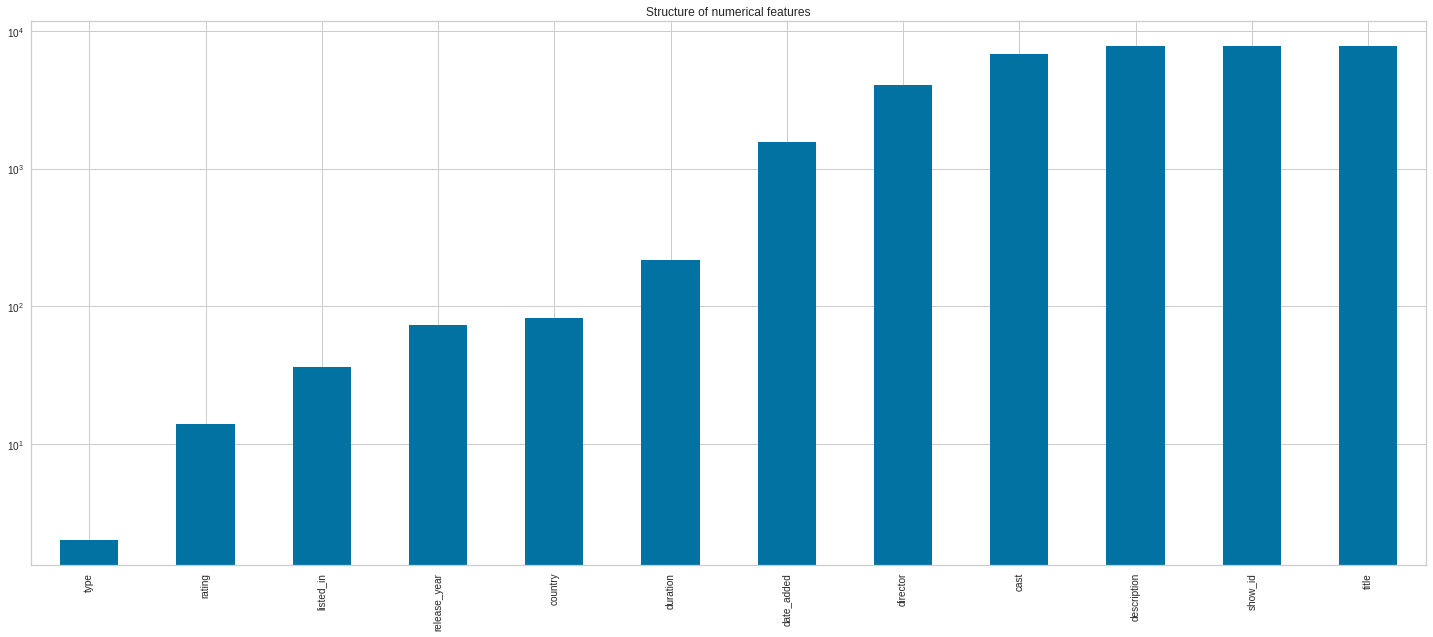

In [18]:
from matplotlib import colors
unique_values = df_netflix.nunique().sort_values()
# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(25, 10), title="Structure of numerical features")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
# Write your code to make your dataset analysis ready.
# Create new features to store date, day, month and year seperately.
df_netflix["date_added"] = pd.to_datetime(df_netflix['date_added'])  
df_netflix['day_added'] = df_netflix['date_added'].dt.day          
df_netflix['year_added'] = df_netflix['date_added'].dt.year          
df_netflix['month_added'] = df_netflix['date_added'].dt.month    

In [20]:
# Create subsets for tv shows and movies.
tv_shows = df_netflix[df_netflix['type'] == 'TV Show']
movies = df_netflix[df_netflix['type'] == 'Movie']

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '') \
                                                       .str.replace(' Seasons', '') \
                                                       .str.replace('s', '')                                                       
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')                                                       
duration_movies.duration = duration_movies.duration.astype(str).astype(int)
     

### What all manipulations have you done and insights you found?

We made new features to store date, day, month and year seperately and made a copy for genres explore 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
## Type of content on Netflix:

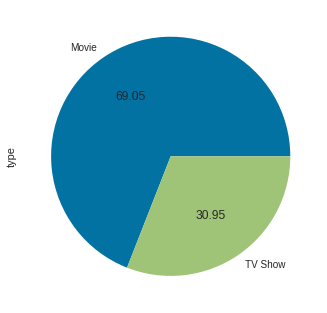

In [21]:
# Chart - 1 visualization code
#Pie chart for type of shows
df_netflix['type'].value_counts().plot(kind='pie',autopct="%.2f")

##### 1. Why did you pick the specific chart?

In general, pie charts can be a useful tool for exploring the distribution of categorical data in a dataset. I therefore employed a pie chart, which enabled me to compare the dependent variable's percentages.

##### 2. What is/are the insight(s) found from the chart?

On Netflix, movies make up 69.05% of the overall material while television shows make up 30.9%.

#### Chart 2 - Top 20 Genres


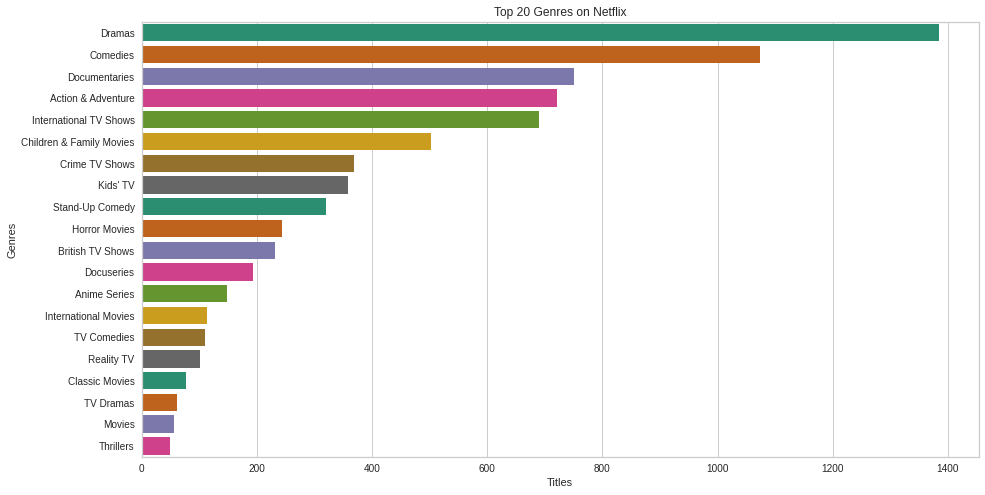

In [22]:
# Chart - 2 visualization code
#Plotting a barplot for getting top 20 genres
# Seprating Genres
genres = df_netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

# ploting graph for top 20 genres
plt.figure(figsize=(15,8))
g = sns.countplot(y = genres, order=genres.value_counts().index[:20],palette = "Dark2")
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages. To see the numbers for different genres i am using bar charts.

##### 2. What is/are the insight(s) found from the chart?



*   From the graph we can see Dramas is the most popular genre.
*   Comedies is the second most popular.
*   Documentries, Action & Adventure, International TV shows have almost equal numbers which places them in 3rd place.





#### Chart - 3 Countries with the highest number of shows

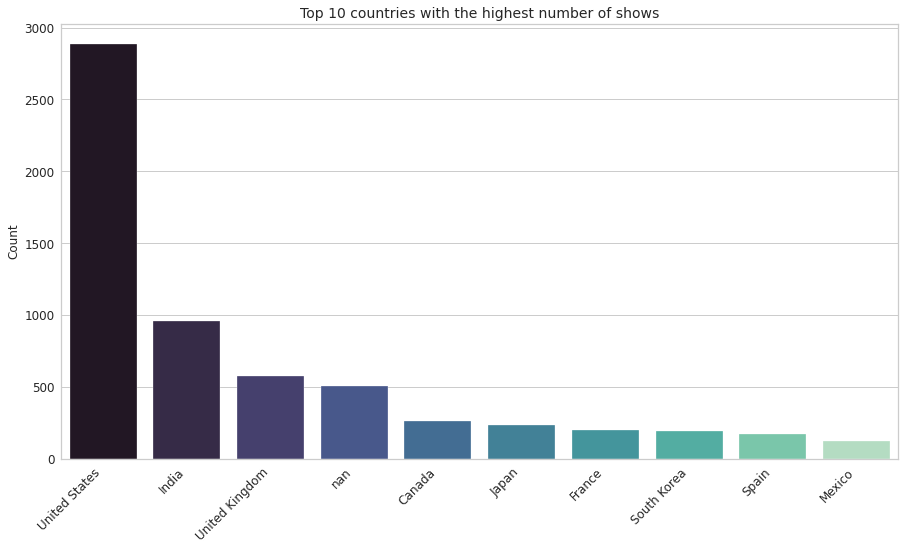

In [23]:
# Chart - 3 visualization code
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.barplot(x=df_netflix[~(df_netflix['country']=='Unknown')].country.value_counts().nlargest(10).index,
            y=df_netflix[~(df_netflix['country']=='Unknown')].country.value_counts().nlargest(10),
            palette='mako')

plt.title('Top 10 countries with the highest number of shows', fontsize=14)
plt.xlabel('')
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Utilizing bars, a countplot is used to calculate the number of data in each category bin. A count plot can be compared to a histogram across a categorical variable as opposed to a quantitative one.

##### 2. What is/are the insight(s) found from the chart?

The most television series are produced in the United States—almost as many as the following nine counties combined. India and the United Kingdom are next.

#### Chart - 4 Monthwise Content Addition

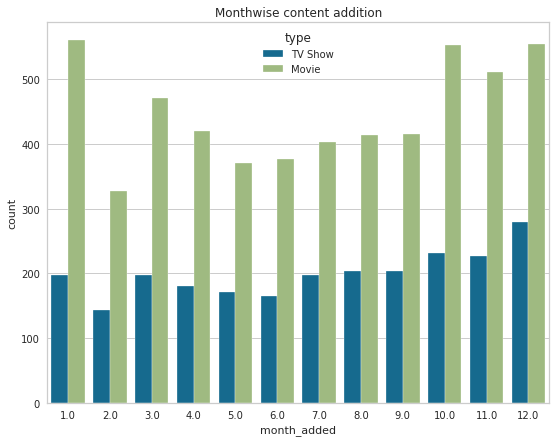

In [24]:
# Chart - 4 visualization code
#Plotting a countplot for getting better insights from monthwise content addition
plt.figure(figsize=(9,7))
sns.countplot(x='month_added',hue='type',data=df_netflix)
plt.title("Monthwise content addition")
plt.show()

##### 1. Why did you pick the specific chart?

Countplot is used to visualize the frequency or count of occurrences of a categorical variable. It helps to understand the distribution of the variable by showing the number of observations in each category. The countplot is a bar graph, with the height of each bar representing the count of observations in each category. It provides a simple and easy way to compare the count of observations in different categories.



##### 2. What is/are the insight(s) found from the chart?

* We can clearly observe that on "January", "October" and in "December" there   is more stuff added on netflix.
* And in "February," there was relatively little substance added.
* Plotting a bar chart to see how many movies/shows have been added on average  on each month's days. 







#### Chart - 5 Daywise Content Addition

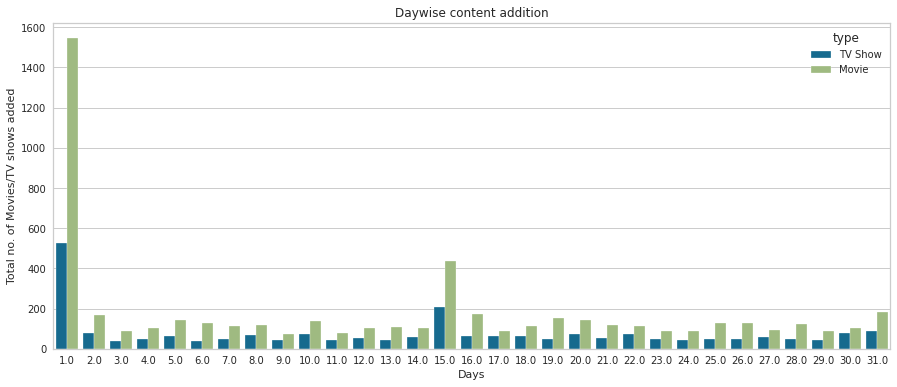

In [25]:
# Chart - 5 visualization code
#Plotting a countplot for getting better insights from datewise content addition
plt.figure(figsize=(15,6))
sns.countplot(x='day_added',hue='type',data=df_netflix)
plt.xlabel('Days')
plt.ylabel('Total no. of Movies/TV shows added')
plt.title("Daywise content addition")
plt.show()

##### 1. Why did you pick the specific chart?

Countplot is used to visualize the frequency or count of occurrences of a categorical variable. It helps to understand the distribution of the variable by showing the number of observations in each category. The countplot is a bar graph, with the height of each bar representing the count of observations in each category. It provides a simple and easy way to compare the count of observations in different categories.

##### 2. What is/are the insight(s) found from the chart?



*  15th day of the month being the 2nd most active day.
*  Most of the releases are on the first day of the month.



#### Chart 6- Top Directors

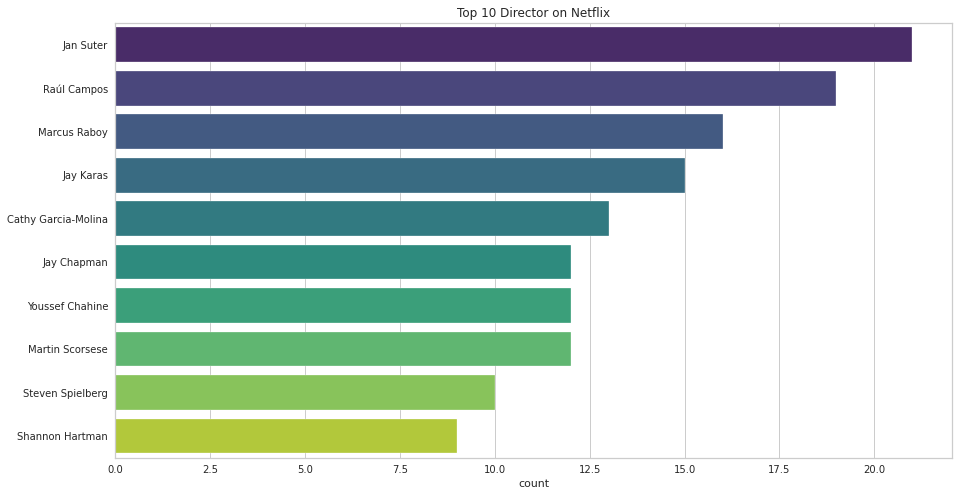

In [26]:
# Bar chart for countries with highest number of shows
# Graph for top 10 directors
directors = df_netflix[df_netflix.director != 'Unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(15, 8))
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='viridis')
plt.title('Top 10 Director on Netflix')
plt.show()


##### 1. Why did you pick the specific chart?

Countplot is used to visualize the frequency or count of occurrences of a categorical variable. It helps to understand the distribution of the variable by showing the number of observations in each category. The countplot is a bar graph, with the height of each bar representing the count of observations in each category. It provides a simple and easy way to compare the count of observations in different categories.

##### 2. What is/are the insight(s) found from the chart?

The above graph shows the Top 10 Directors on Netflix based on number of releases.

#### Chart - 7
## Top 10 Actors on Netflix

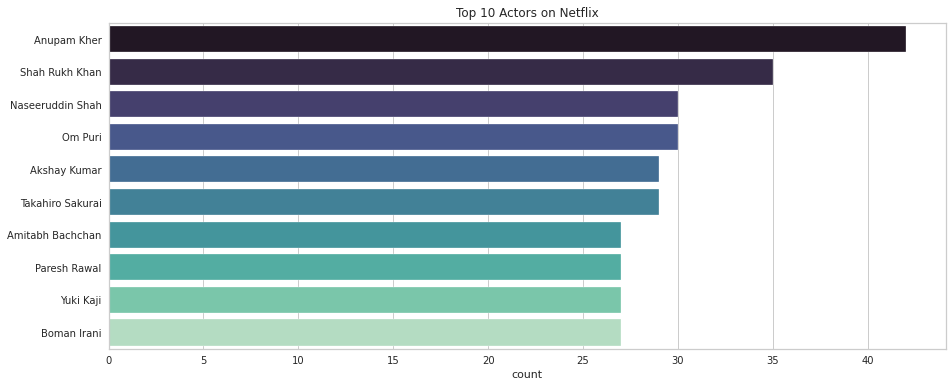

In [27]:
# Graph for top 10 actors
plt.figure(figsize=(15, 6))
actor = df_netflix[df_netflix.cast != 'Unknown'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = actor, order=actor.value_counts().index[:10], palette='mako')
plt.title('Top 10 Actors on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot is used to visualize the frequency or count of occurrences of a categorical variable. It helps to understand the distribution of the variable by showing the number of observations in each category. The countplot is a bar graph, with the height of each bar representing the count of observations in each category. It provides a simple and easy way to compare the count of observations in different categories.

##### 2. What is/are the insight(s) found from the chart?

Anupam Kher Have the most number of films on Netflix followed by Takahiro Sakurai And Shah Rukh Khan.

#### Chart - 8
## The year in which the movie / tv show was released

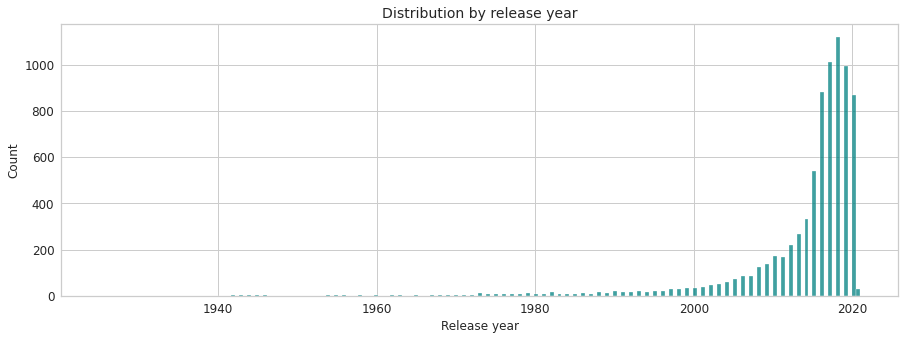

In [28]:
# Chart - 8 visualization code
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
sns.histplot(df_netflix['release_year'], color='teal')

plt.title('Distribution by release year', fontsize=14)
plt.xlabel('Release year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [29]:
# Plot growth of the contents over the years.
tv_show = df_netflix[df_netflix["type"] == "TV Show"]
movie = df_netflix[df_netflix["type"] == "Movie"]

col = "year_added"

content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

trace1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color='#db0000'))
trace2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color='#564d4d'))

data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", title_x=0.47, legend=dict(x=0.4, y=1.1, orientation="h"),
                   xaxis_title="Year", yaxis_title="Count")
fig = go.Figure(data, layout=layout)

fig.show()

##### 1. Why did you pick the specific chart?



*   One common graphing tool is the histogram. It is employed to present interval-scaled summaries of discrete or continuous data. It is frequently used to conveniently depict the main characteristics of the data distribution. Additionally, it is helpful when working with enormous data sets (greater than 100 observations). It can assist in finding any anomalous observations (outliers) or data gaps.

*   A line chart is used to represent data over time or to display the trend of a single data set over time. Line charts are used to see changes in data over time and to see overall trends such as an increase or decrease in data. Line charts are particularly useful when large amounts of data are involved and when it is necessary to make a comparison between several data sets.



##### 2. What is/are the insight(s) found from the chart?



*   From the first graph we can see a 'J' shaped curve representing growth in distribution by years.
*   Growth in the number of movies on Netflix is much higher than tv shows.
*   From 2015 we can see a noticeable addition in the number of movies and tv shows uploaded by Netflix on its platform.
*   The highest number of movies and tv shows got added in 2019 and 2020.
*   The line plot shows very few movies, and tv shows got added in 2021. It is due to very little data collected from the year 2021.





#### Chart - 9
## Age ratings for shows in the dataset

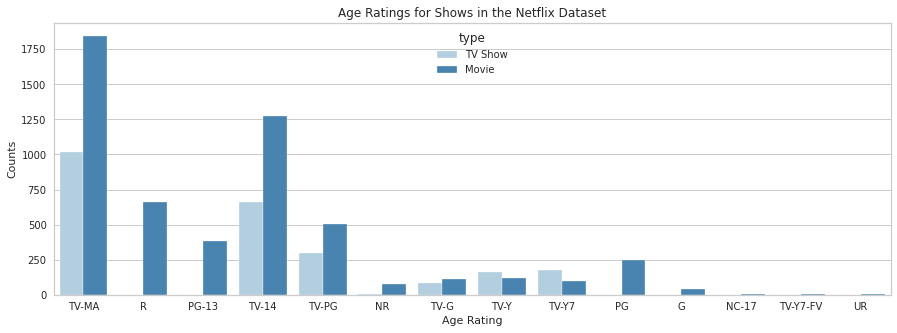

In [30]:
# Chart - 9 visualization code
#Age ratings for shows in the dataset
plt.figure(figsize=(15,5))
g = sns.countplot(x='rating', hue='type', data=df_netflix, palette='Blues')
plt.title('Age Ratings for Shows in the Netflix Dataset')
plt.xlabel('Age Rating')
plt.ylabel('Counts')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot is used to visualize the frequency or count of occurrences of a categorical variable. It helps to understand the distribution of the variable by showing the number of observations in each category. The countplot is a bar graph, with the height of each bar representing the count of observations in each category. It provides a simple and easy way to compare the count of observations in different categories.

Understanding the Age Rating is important to know whats in demand.

##### 2. What is/are the insight(s) found from the chart?

This graph shows the distribution of different Age Ratings in 2 catogaries. i.e. Movies and Tv Shows

#### Chart - 10
## Datewise content addition

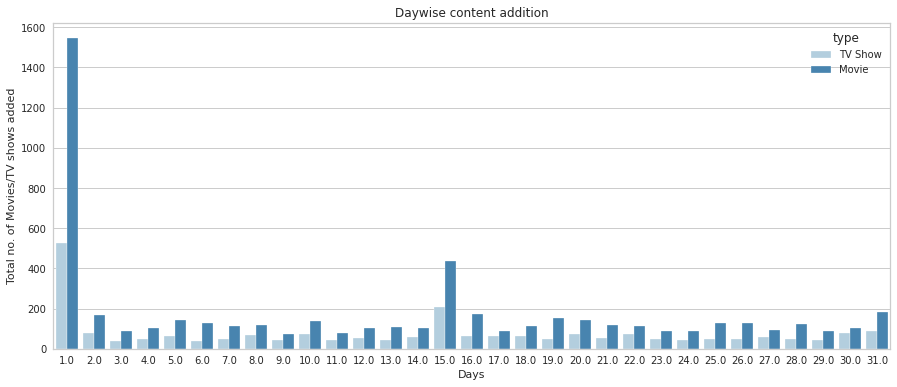

In [31]:
# Chart - 10 visualization code
#Plotting a countplot for getting better insights from datewise content addition
plt.figure(figsize=(15,6))
sns.countplot(x='day_added',hue='type',palette='Blues',data=df_netflix)
plt.xlabel('Days')
plt.ylabel('Total no. of Movies/TV shows added')
plt.title("Daywise content addition")
plt.show()
     

##### 1. Why did you pick the specific chart?

Countplot is used to visualize the frequency or count of occurrences of a categorical variable. It helps to understand the distribution of the variable by showing the number of observations in each category. The countplot is a bar graph, with the height of each bar representing the count of observations in each category. It provides a simple and easy way to compare the count of observations in different categories.

##### 2. What is/are the insight(s) found from the chart?



*   Most of the releases are on the first day of the month.
*   15th day of the month being the 2nd most active day.



#### Chart - 11
## Seasons in each TV show

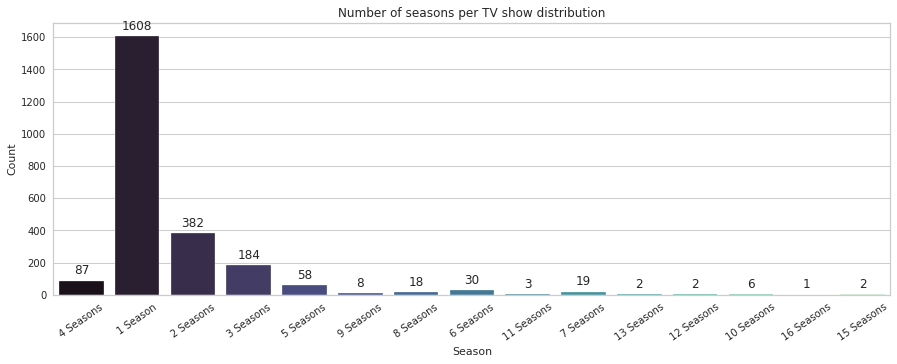

In [32]:
# Chart - 11 visualization code
# Seasons in each TV show

plt.figure(figsize=(15,5))

# Filter the dataframe to only include TV shows
tv_shows_df = df_netflix[df_netflix['type']=='TV Show']

p = sns.countplot(x='duration',palette='mako',data=tv_shows_df)
plt.title('Number of seasons per TV show distribution')

# Add count annotations to each bar
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel('Season')
plt.ylabel('Count')
# Tilt the x-axis labels
plt.xticks(rotation=35)
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots are used to compare the values of a categorical variable across different categories. The height of each bar represents the value of the variable for each category, making it easy to compare the values across categories. Bar plots can be used to visualize the distribution of a continuous or discrete variable, as well as the relationship between two variables.

##### 2. What is/are the insight(s) found from the chart?



*   1608 Tv series have 1 season
*   382 TV series had a follow up season.
*   After season 5 the number of TV Series with follow up season are in single digits.





#### Chart - 12
## Word Cloud

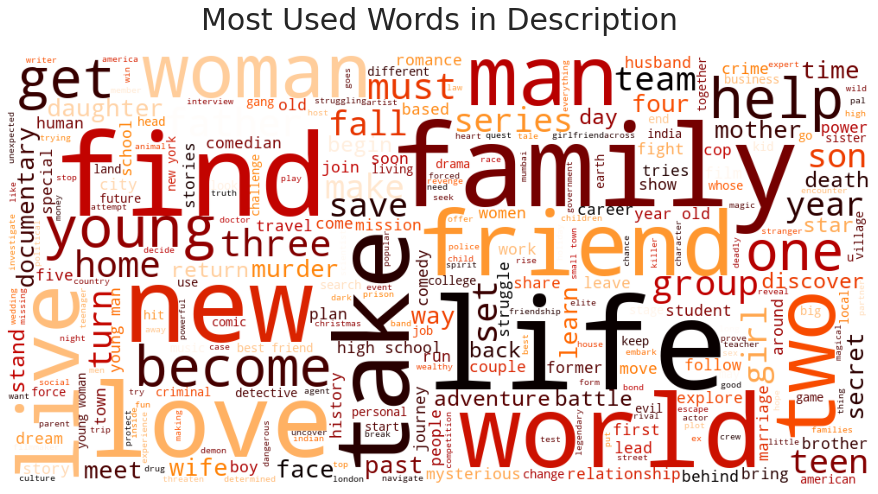

In [33]:

# Chart - 11 visualization code
# Create a string to store all the words.

# Get the stopwords
stop_words = set(stopwords.words("english"))

# Create a string to store all the words.
all_words = ''

# Iterate through the description column of the dataframe.
for description in df_netflix.description:
    # Convert the description to a string
    description = str(description)
    
    # Split the description into tokens
    tokens = description.split()
    
    # Convert each token to lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    # Join the tokens back into a string and add it to `all_words`
    all_words += " ".join(tokens) + " "

# Generate the wordcloud
wordcloud = WordCloud(width=1000, height=500,
                      background_color='white',
                      stopwords=stop_words,
                      min_font_size=10,
                      max_words=1000,
                      colormap='gist_heat').generate(all_words)

# Plot the wordcloud
plt.figure(figsize=(12, 8))
plt.title('Most Used Words in Description', fontsize=30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

##### 1. Why did you pick the specific chart?

A word cloud, also known as a tag cloud, is a visual representation of the frequency of words in a text dataset. The size of each word in the cloud is proportional to its frequency of occurrence in the text, allowing the most frequent words to be easily identified. Word clouds provide a quick and simple way to gain insights into the content and structure of a text dataset, and to identify the most important or relevant words.

It is good to understand what keywords are used in the description

##### 2. What is/are the insight(s) found from the chart?



*   Life,Find,Family are the 3 most used words.
*   Followed by new,world,friend,take.



#### Chart - 13
## Most used words in title

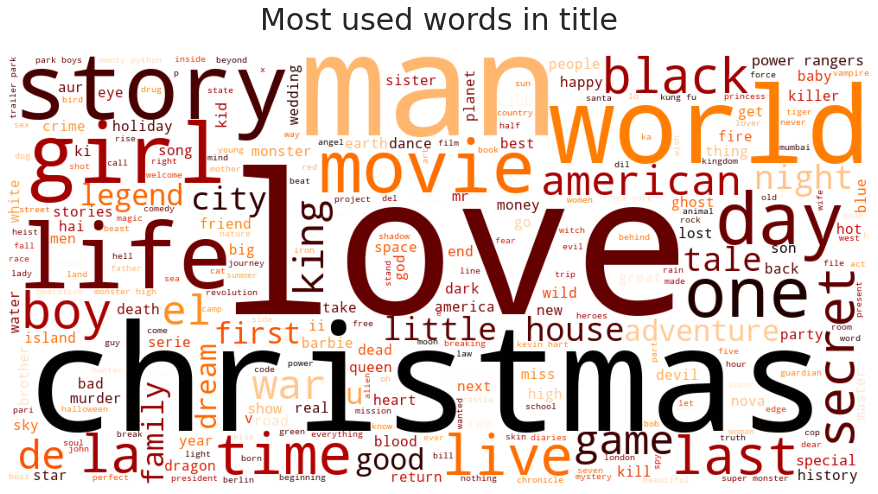

In [34]:
# Chart - 13 visualization code
# iterate through the column.
comment_words = ''
for val in df_netflix.title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = set(nltk.corpus.stopwords.words('english')),
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (12, 8), facecolor = None)
plt.title('Most used words in title', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
     

##### 1. Why did you pick the specific chart?

A word cloud, also known as a tag cloud, is a visual representation of the frequency of words in a text dataset. The size of each word in the cloud is proportional to its frequency of occurrence in the text, allowing the most frequent words to be easily identified. Word clouds provide a quick and simple way to gain insights into the content and structure of a text dataset, and to identify the most important or relevant words.

##### 2. What is/are the insight(s) found from the chart?



*  The most used words christmas,world,story and love. 
*  At second place we have life, last,time and live.





#### Chart - 14 - Correlation Heatmap

In [35]:
# Correlation Heatmap visualization code
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}
df_netflix2 = df_netflix.copy()
df_netflix2['rating'].replace(rating_map, inplace = True)
#The unique() method is used to display the unique values in the 'rating' column of the new data frame.
df_netflix2['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids', nan],
      dtype=object)

In [36]:
df_netflix2['country'] = df_netflix2['country'].astype('|S')

In [37]:
df_netflix2['principal_country'] = df_netflix2['country'].apply(lambda x: x.decode().split(",")[0])
df_netflix2['principal_country'].head()

country_order = df_netflix2['principal_country'].value_counts()[:11].index
content_data = df_netflix2[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]
     

df_netflix2['count'] = 1
data = df_netflix2.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']

Flix_df_heatmap = df_netflix2.loc[df_netflix2['principal_country'].isin(data)]
Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['rating'],normalize = "index").T
Flix_df_heatmap

principal_country,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States,nan
rating,,,,,,,,,,
Adults,0.467181,0.627551,0.259414,0.364407,0.764228,0.463918,0.797619,0.526863,0.488194,0.318182
Kids,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.077990,0.074653,0.171937
Older Kids,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.183709,0.196528,0.235178
Teens,0.027027,0.030612,0.004184,0.012712,0.016260,0.000000,0.017857,0.071057,0.098264,0.005929
Young Adults,0.135135,0.142857,0.557531,0.338983,0.113821,0.365979,0.095238,0.140381,0.142361,0.268775


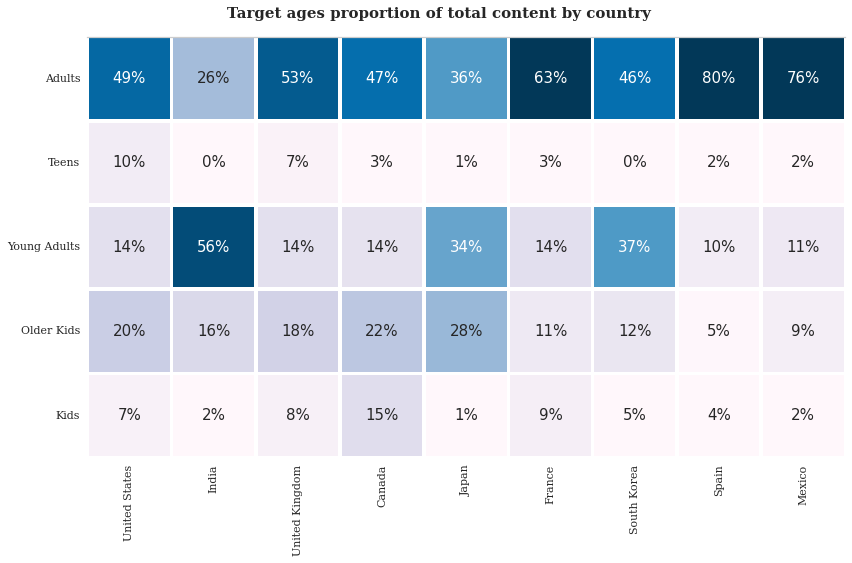

In [38]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 12))

# Define the countries and ages to be included in the plot
country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

# Plot the heatmap
sns.heatmap(Flix_df_heatmap.loc[age_order, country_order], cmap="PuBu", square=True, linewidth=2.5, cbar=False,
            annot=True, fmt='2.0%', vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize": 15})

# Customize the plot
ax.spines['top'].set_visible(True)
fig.text(.76, .765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')   
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation=0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='both', which='both', length=0)

# Improve the layout
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is a graphical representation of the correlation between different variables in a dataset. It displays a matrix of colors that represent the correlation between every pair of variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?



*    India being a country of young adults(age range below 30) display a good correlation with the young adult age rating.so do japan and south korea.
*   The age rating of Adults shows a huge correlation with almost all countries, specially spain and mexico.



#### Chart - 15 - Pair Plot 

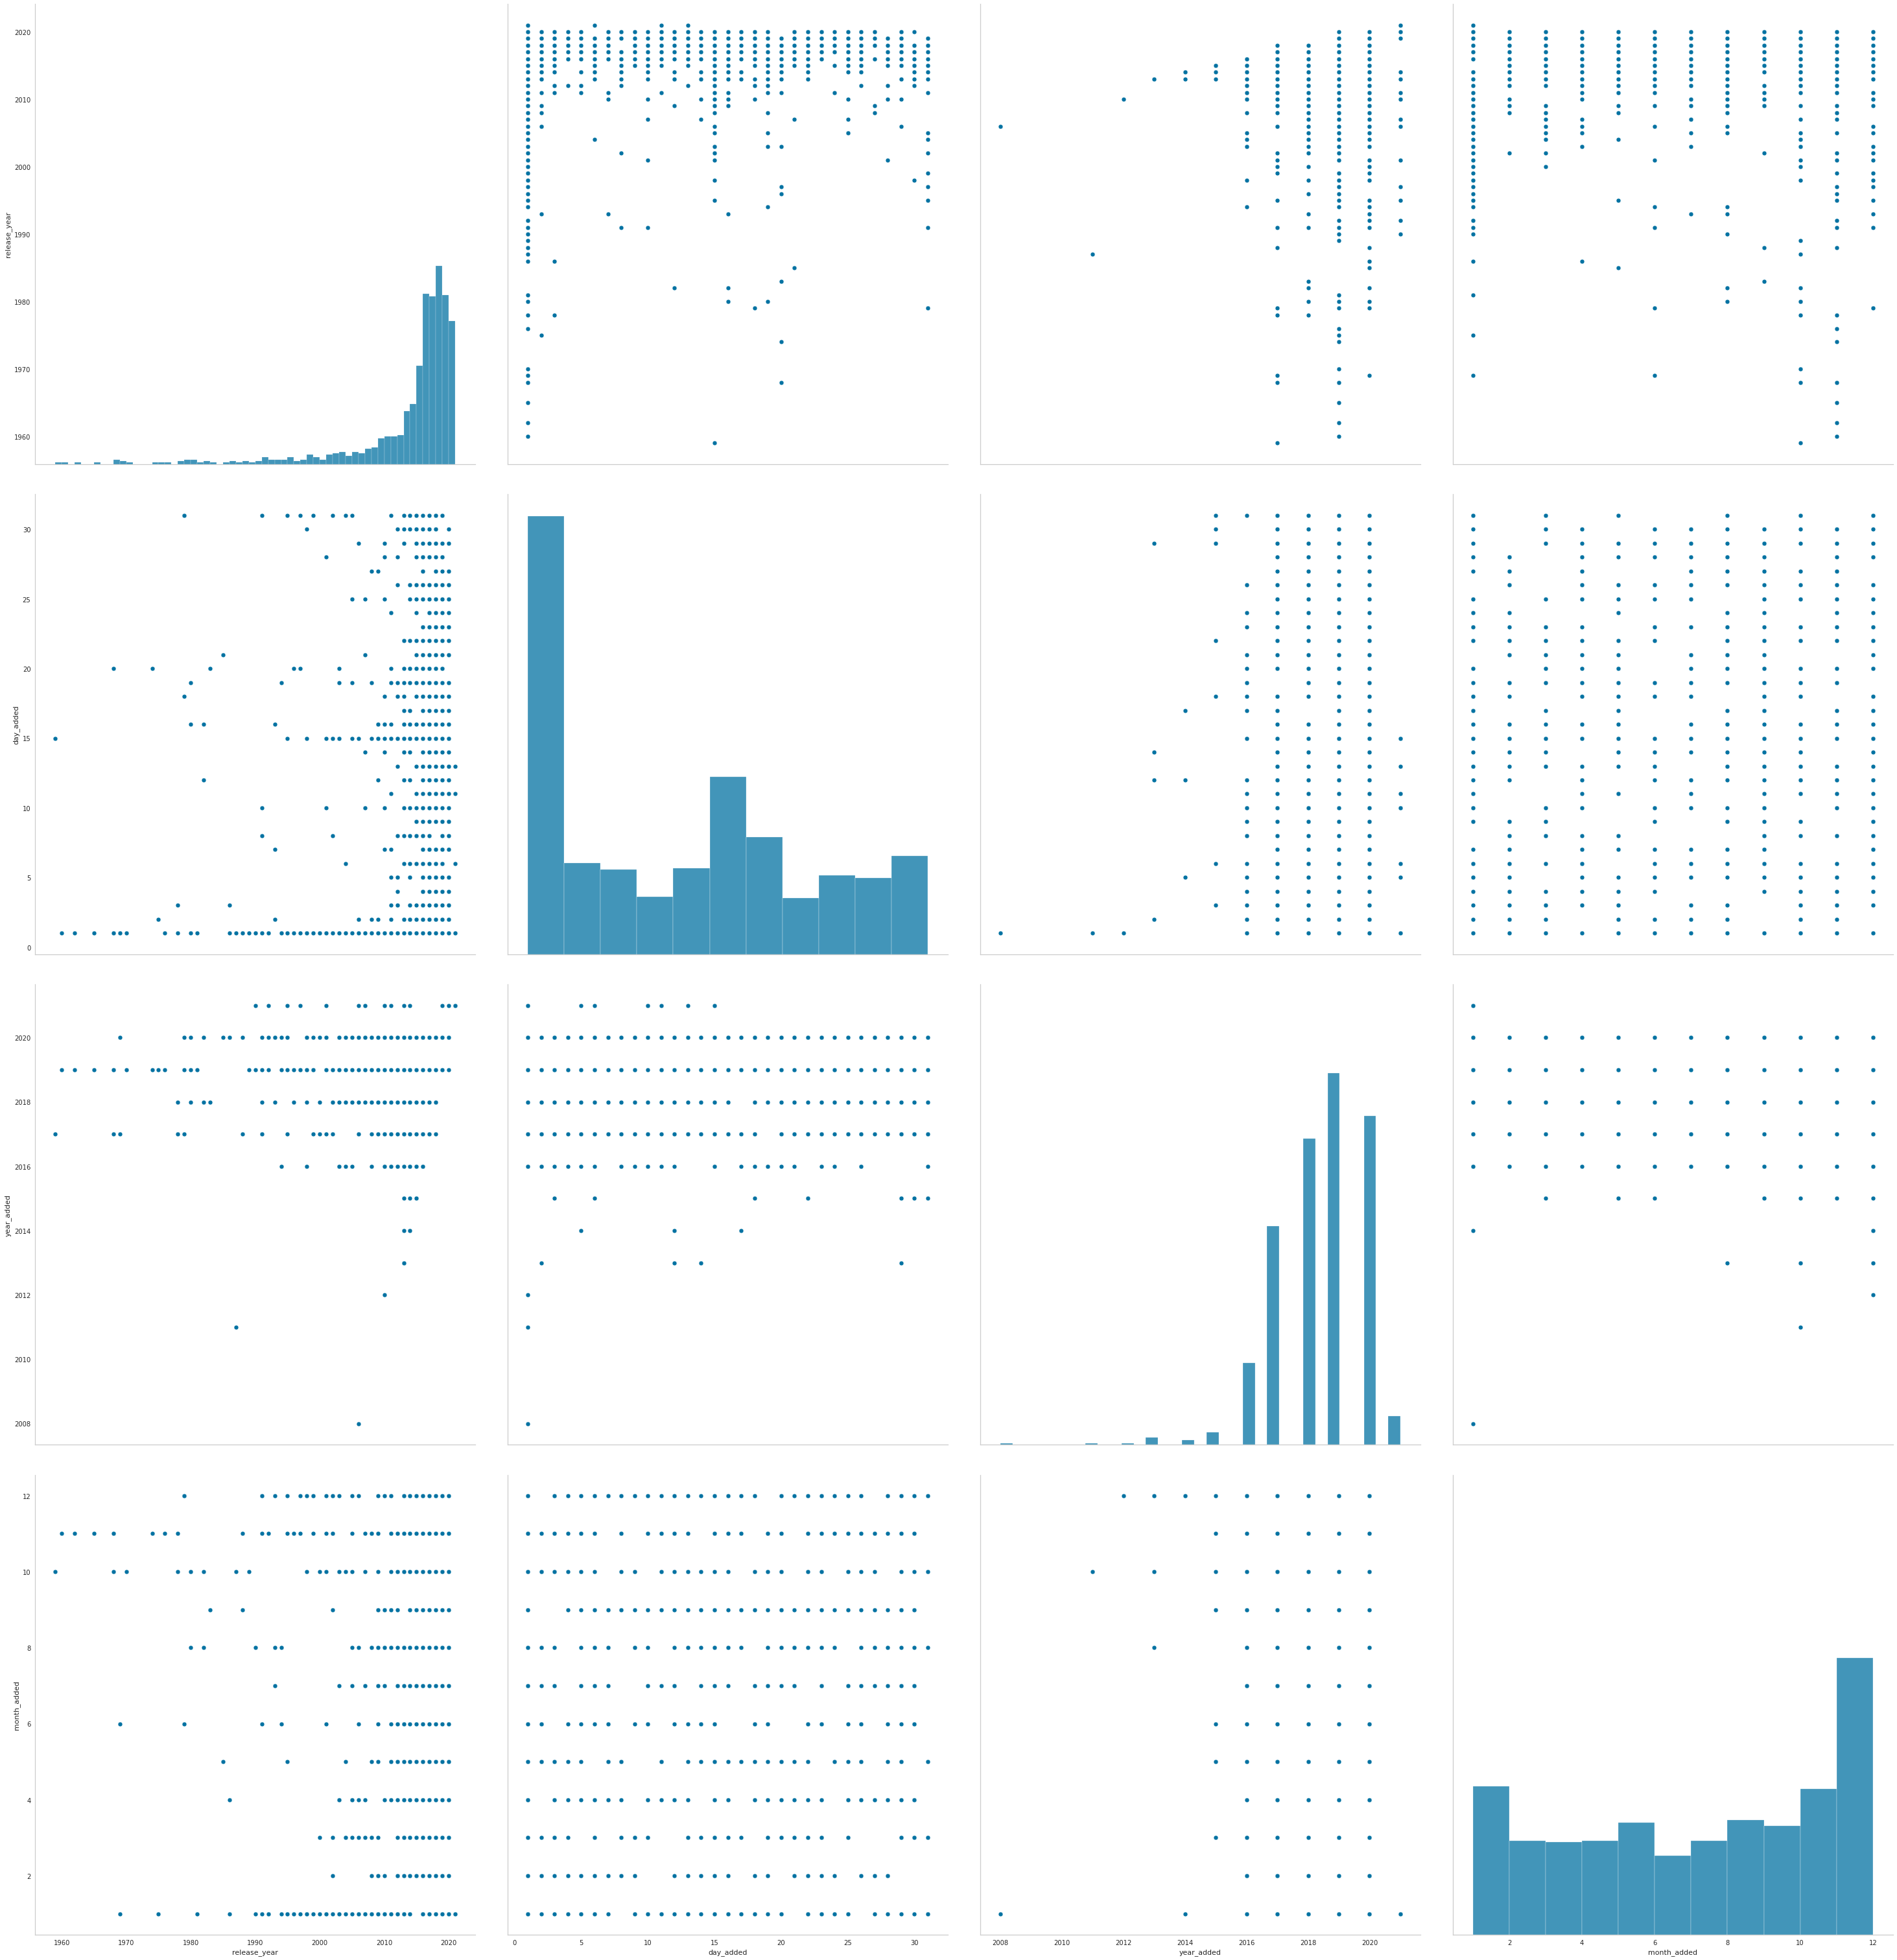

In [39]:
# Pair Plot visualization code
# Pair Plot visualization code
sns.set_style("whitegrid", {'axes.grid' : False}) #set style of the plot

#plot the pair plot of all the required columns in the dataframe
pp=sns.pairplot(df_netflix.sample(1000))
pp.fig.set_size_inches(45,45)
     

##### 1. Why did you pick the specific chart?


A pair plot is a graphical tool used to visualize the relationship between pairs of variables in a dataset. It displays scatter plots of all possible pairwise combinations of variables, along with the distribution of each variable along the diagonal of the plot. 

##### 2. What is/are the insight(s) found from the chart?

Here in the scatter plot matrix we can see the disstribution of different features.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.


1.   Is Netflix has increasingly focusing on TV rather than movies in recent years?
2.   Content type(Movies/TV series) does not have a significant impact on their run time.
3.   Content type(Movies/TV series) have a significant impact on their ratings.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis Testing to check is there is any relation between year_added and type:

* Null Hypothesis:  Content type(Movies/TV series) have a significant impact on their ratings.
* Alternative Hypothesis: Content type(Movies/TV series) does not have a significant impact on their ratings.

Set significance level to 0.05.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
hypo_data = pd.crosstab(df_netflix['type'], df_netflix['year_added'], margins=False)
print(hypo_data)

year_added  2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  2014.0  2015.0  \
type                                                                         
Movie            1       2       1      13       3       6      19      58   
TV Show          1       0       0       0       0       5       6      30   

year_added  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0  
type                                                        
Movie          258     864    1255    1497    1312      88  
TV Show        185     361     430     656     697      29  


In [41]:
# making a function as we are going to use this code multiple times
def hypothesis_testing(dataset):
  stat, p, dof, expected = chi2_contingency(dataset)

  print("Statistics: ", stat)
  print("P-Value: ", p)
  print("Degree of Freedom: ", dof)

In [42]:
hypothesis_testing(hypo_data)

Statistics:  75.22727567916088
P-Value:  8.635372719955464e-11
Degree of Freedom:  13


In [43]:
from collections import Counter

In [44]:
# Now lets check what type of content got added in the past few years.

'''We will only check for the type of genres that got added in the years 2018-2021 for better visualization. '''

# Create subset of data with required columns.
recent_years = pd.DataFrame(df_netflix.groupby(['year_added', 'listed_in'])['listed_in'].count())
recent_years.rename(columns={'listed_in':'Count'}, inplace=True)
recent_years = recent_years.reset_index()
recent_years.drop(recent_years[recent_years.year_added < 2018].index, inplace=True)

''' There are many rows with multiple genre entries therefore we will
 create a function to split each of them and get their respective counts.'''
 
def seperate_all_genre(year):
  year_added = recent_years[recent_years['year_added'] == year]
  year_added = ", ".join(year_added['listed_in'].dropna()).split(", ")
  year_added_dict = dict(Counter(year_added))
  return year_added_dict
# Create a list of years.
yr_list = [2018,2019,2020,2021]
# Iterate through all values in yr_list.
yr_genre_count_list = {}
for i in yr_list:
  data = seperate_all_genre(i)
  yr_genre_count_list[i] = data
  yr_genre_count_df = pd.DataFrame(yr_genre_count_list).reset_index()
  yr_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

In [45]:
# Plot the above data.
df = yr_genre_count_df.sort_values([2018,2019,2020,2021],ascending=False)
fig = go.Figure()
fig.add_trace(go.Scatter(y=df[2018], x=df['Genre'],
                    mode='lines+markers',
                    name=2018))
fig.add_trace(go.Scatter(y=df[2019], x=df['Genre'],
                    mode='lines+markers',
                    name=2019))
fig.add_trace(go.Scatter(y=df[2020], x=df['Genre'],
                    mode='lines+markers', 
                    name=2020))
fig.add_trace(go.Scatter(y=df[2021], x=df['Genre'],
                    mode='lines+markers', 
                    name=2021))
fig.update_xaxes(tickangle=-90)
fig.update_layout(title={'text': 'Most added Genres in recent years.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,legend=dict(x=0.38, y=1.1, orientation="h"))

fig.show()

##### Which statistical test have you done to obtain P-Value?

"I used Chi-squared as the statistical test to obtain a p-value and found that the null hypothesis is not true. Based on this result, it can be concluded that year_added has no impact on the type of content added to the platform. Therefore, the alternate hypothesis is accepted."

##### Why did you choose the specific statistical test?

The chi-squared test is a statistical test used to determine if there is a significant relationship between two categorical variables. It is used to compare the observed frequencies in a contingency table to the expected frequencies under the assumption that the two variables are independent.
 
The p-value is then used to determine the significance of the test statistic. If the p-value is less than a significance level (e.g. 0.05), then we reject the null hypothesis that the two variables are independent and conclude that there is a relationship between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis Testing to check is there is any relation between year_added and type:

* Null Hypothesis:  Content type(Movies/TV series) does not have a significant impact on their run time.
* Alternative Hypothesis: Content type(Movies/TV series) have significant impact on their run time.

Set significance level to 0.05.

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value
hypo_data2 = pd.crosstab(df_netflix['type'], df_netflix['duration'], margins=False)
print(hypo_data2)

duration  1 Season  10 Seasons  10 min  100 min  101 min  102 min  103 min  \
type                                                                         
Movie            0           0       1       97       96       98      101   
TV Show       1608           6       0        0        0        0        0   

duration  104 min  105 min  106 min  107 min  108 min  109 min  11 Seasons  \
type                                                                         
Movie          89       91       97       85       74       61           0   
TV Show         0        0        0        0        0        0           3   

duration  11 min  110 min  111 min  112 min  113 min  114 min  115 min  \
type                                                                     
Movie          2       86       61       65       54       45       47   
TV Show        0        0        0        0        0        0        0   

duration  116 min  117 min  118 min  119 min  12 Seasons  12 min  120 min  \


In [47]:
hypothesis_testing(hypo_data2)

Statistics:  7786.999999999999
P-Value:  0.0
Degree of Freedom:  215


In [48]:
# Perform Statistical Test to obtain P-Value
# Create subsets for tv shows and movies.
tv_shows = df_netflix[df_netflix['type'] == 'TV Show']
movies = df_netflix[df_netflix['type'] == 'Movie']

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '') \
                                                       .str.replace(' Seasons', '') \
                                                       .str.replace('s', '')                                                       
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')                                                       
duration_movies.duration = duration_movies.duration.astype(str).astype(int)

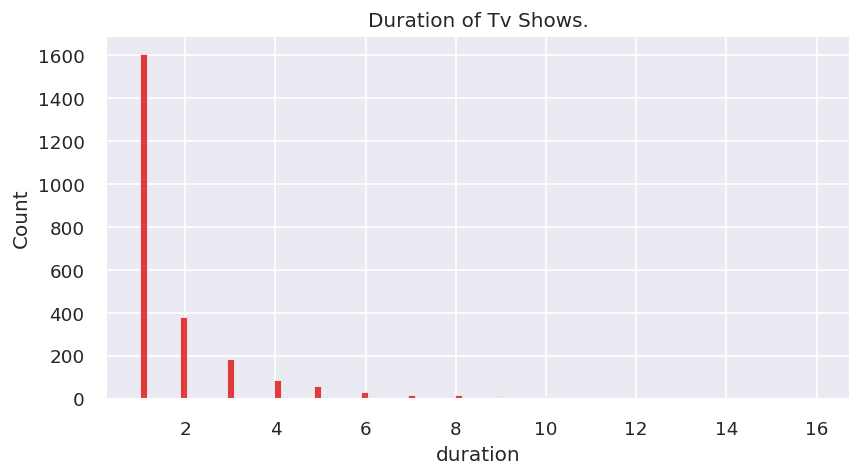

In [49]:
# Plot the above durations.
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration'], color='#db0000')
plt.title('Duration of Tv Shows.')
plt.show()   

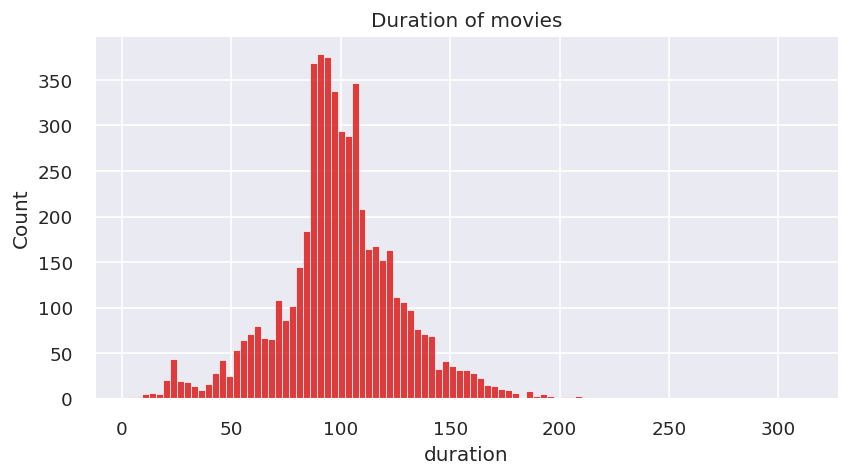

In [50]:
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_movies['duration'], color='#db0000')
plt.title('Duration of movies')
plt.show()

##### Which statistical test have you done to obtain P-Value?

I have used Chi-squared as the statistical testing to obtain P-Value and found the result that Null hypothesis is True and Content type(Movies/TV series) does not have a significant impact on their run time.

##### Why did you choose the specific statistical test?

The chi-squared test is a statistical test used to determine if there is a significant relationship between two categorical variables. It is used to compare the observed frequencies in a contingency table to the expected frequencies under the assumption that the two variables are independent.
 
The p-value is then used to determine the significance of the test statistic. If the p-value is less than a significance level (e.g. 0.05), then we reject the null hypothesis that the two variables are independent and conclude that there is a relationship between them.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis Testing to check is there is any relation between year_added and type:

* Null Hypothesis:  Content type(Movies/TV series) have a significant impact on their ratings.
* Alternative Hypothesis: Content type(Movies/TV series) does not have a significant impact on their ratings.

Set significance level to 0.05.

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value
hypo_data3 = pd.crosstab(df_netflix['type'], df_netflix['rating'], margins=False)
print(hypo_data3)

rating    G  NC-17  NR   PG  PG-13    R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  \
type                                                                       
Movie    39      3  79  247    386  663   1272   111   1845    505   117   
TV Show   0      0   5    0      0    2    659    83   1018    301   163   

rating   TV-Y7  TV-Y7-FV  UR  
type                          
Movie       95         5   5  
TV Show    176         1   0  


In [52]:
hypothesis_testing(hypo_data3)

Statistics:  931.8414205494452
P-Value:  7.496336931137807e-191
Degree of Freedom:  13


In [53]:
# Perform Statistical Test to obtain P-Value
movies_rating = dict(movies['rating'].value_counts())
tv_shows_rating = dict(tv_shows['rating'].value_counts())

In [54]:
# plot the count of ratings for Tv shows and movies to understand them better.
fig = go.Figure()
fig.add_trace(go.Bar(x=list(tv_shows_rating.keys()),
                y=list(tv_shows_rating.values()),
                text=list(tv_shows_rating.values()),
                name='Tv-Shows',
                marker_color='rgb(219,0,0)'
                ))
fig.add_trace(go.Bar(x=list(movies_rating.keys()),
                y=list(movies_rating.values()),
                text=list(movies_rating.values()),
                name='Movies',
                marker_color='rgb(86,77,77)'
                ))

fig.update_layout(
    title='Ratings',title_x=0.47,
    xaxis_tickfont_size=15,
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.19,
    bargroupgap=0.2 
)
fig.show()

##### Which statistical test have you done to obtain P-Value?

I have used Chi-squared as the statistical testing to obtain P-Value and found the result that Null hypothesis isn't True and Content type(Movies/TV series) does not have a significant impact on their ratings. 

Therfore, we accept the Alternate Hypothesis here.

##### Why did you choose the specific statistical test?

The chi-squared test is a statistical test used to determine if there is a significant relationship between two categorical variables. It is used to compare the observed frequencies in a contingency table to the expected frequencies under the assumption that the two variables are independent.
 
The p-value is then used to determine the significance of the test statistic. If the p-value is less than a significance level (e.g. 0.05), then we reject the null hypothesis that the two variables are independent and conclude that there is a relationship between them.

## ***6. Feature Engineering & Data Pre-processing***

Feature engineering is the pre-processing step of machine learning, which is used to transform raw data into features that can be used for creating a predictive model using Machine learning or statistical Modelling. Feature engineering in machine learning aims to improve the performance of models.

Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model.

### 1. Clustering New Attributes

We will cluster the shows on Netflix based on the following attributes:-



*  Director 
*  Cast
*  Country
*  Listed(genres)
*  Description









In [55]:
# Using the model_df dataset for clustering since
# it does not require handling missing values
df1 = df_netflix.copy()  

In [56]:
df1.fillna('',inplace=True)

In [57]:
# Combining all the clustering attributes into a single column

df1['clustering'] = (df1['director'] + ' ' + 
                                df1['cast'] +' ' + 
                                df1['country'] +' ' + 
                                df1['listed_in'] +' ' + 
                                df1['description'])

In [58]:
# Select the 100 number of clusters for the dataset 
df1['clustering'][100]

"Rajkumar Hirani Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey India Comedies While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."

### 2. Remove stopwords and lower case


In [59]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# displaying the stopwords
np.array(stop_words)
     

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [60]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [61]:
# Removing stop words
df1['clustering'] = df1['clustering'].apply(stopwords)
     

In [62]:
# Select the 100 number of clusters for the dataset 
df1['clustering'][100]


"rajkumar hirani aamir khan, kareena kapoor, madhavan, sharman joshi, omi vaidya, boman irani, mona singh, javed jaffrey india comedies attending one india's premier colleges, three miserable engineering students best friends struggle beat school's draconian system."


Removing stop words and lowercasing words are common pre-processing steps in natural language processing (NLP) tasks.

Stop words are words that are commonly used in a language but do not convey much meaning on their own, such as "a," "an," "the," and "is." These words can add noise to the data and can sometimes affect the performance of NLP models, so they are often removed as a pre-processing step.

Lowercasing words is the process of converting all the words in a text to lowercase. This is a common pre-processing step in NLP tasks, as it can be useful for a few reasons:-


*  Case differences can be ignored: By lowercasing the words, you can treat words with different capitalization as the same word, which can be useful in tasks such as information retrieval or text classification where case differences are not important.
*  Vocabulary size is reduced: Lowercasing the words can also reduce the size of the vocabulary, which can make it easier to work with larger texts or texts in languages with a high number of inflected forms.



### 3. Removing non-ASCII characters

In [63]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
     

In [64]:
# remove non-ascii characters
df1['clustering'] = remove_non_ascii(df1['clustering'])
     

In [65]:
# Select the 100 number of clusters for the dataset 
df1['clustering'][100]

"rajkumar hirani aamir khan, kareena kapoor, madhavan, sharman joshi, omi vaidya, boman irani, mona singh, javed jaffrey india comedies attending one india's premier colleges, three miserable engineering students best friends struggle beat school's draconian system."



Non-ASCII characters are those that are not encoded in ASCII, such as Unicode, EBCDIC, etc. ASCII is limited to 128 characters.

This approach uses a Regular Expression to remove the Non-ASCII characters from the string.

Only characters that have values from zero to 127 are valid. (0x7F is 127 in hex).

### 4. Remove punctuations

In [66]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
     

In [67]:
# applying remove_punctuation function to Removing punctuation marks
df1['clustering'] = df1['clustering'].apply(remove_punctuation)


In [68]:
# Select the 100 number of clusters for the dataset 
df1['clustering'][100]
     

'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'



The punctuation removal process will help to treat each text equally.used to divide text into sentences, paragraphs and phrases

Removing punctuation is a common pre-processing step in natural language processing (NLP) tasks. Punctuation marks like periods, commas, and exclamation points can add noise to the data and can sometimes be treated as separate tokens, which can affect the performance of NLP models.

### 5. Tokenization

In [69]:
# Create a reference variable for Class TweetTokenizer
tokenizer = TweetTokenizer()


In [70]:
# Create text column based on dataset
df1['clustering'] = df1['clustering'].apply(lambda x: tokenizer.tokenize(x))     

In [71]:
# Select the 100 number of Tokenization for the dataset 
print(df1['clustering'][100])
     

['rajkumar', 'hirani', 'aamir', 'khan', 'kareena', 'kapoor', 'madhavan', 'sharman', 'joshi', 'omi', 'vaidya', 'boman', 'irani', 'mona', 'singh', 'javed', 'jaffrey', 'india', 'comedies', 'attending', 'one', 'indias', 'premier', 'colleges', 'three', 'miserable', 'engineering', 'students', 'best', 'friends', 'struggle', 'beat', 'schools', 'draconian', 'system']


##### Which text normalization technique have you used and why?

Tokenization is splitting the input data into a sequence of meaningful parts e.g. pice data like a word, image patch, document sentence. Tokenization is cutting input data into meaningful parts that can be embedded into a vector space.

tokenization reduces risk from data breaches, helps foster trust with customers, minimizes red tape and drives technology behind popular payment services like mobile wallets. Best of all, businesses reap all these benefits today.

### 6. Text Vectorization

In [72]:
# clustering tokens saved in a variable
clustering_vectors = df1['clustering']
     

In [73]:
#Tokenization
def identity_tokenizer(text):
    return text

#Using TFIDF vectorizer to vectorize the corpus 
#max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
x = tfidf.fit_transform(clustering_vectors)
     

In [74]:
# Dataset Rows & Columns count
x.shape

(7787, 20000)

In [75]:
# convert X into array form for clustering
X = x.toarray()


In [76]:
# Check the matrix
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##### Which text vectorization technique have you used and why?

Word/Text vectorization is the process of representing words as numerical vectors. This is important in NLP tasks because most machine learning models expect numerical input and cannot work with raw text data directly. Word vectorization allows you to input the words into a machine learning model in a way that preserve the meaning and context of the words. Word vectorization can also be used to measure the similarity between words using vector arithmetic.

*   We can vectorize the corpus using TFIDF vectorizer, where TFIDF stands for Term Frequency Inverse Document Frequency.
*   TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
*   IDF(t) = log_e(Total number of documents / Number of documents with term t in it).






### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

We have a problem here with the huge dimensionality so we have reduced the dimensions for effectiveness.

In [77]:
# using PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X)
     

PCA(random_state=40)

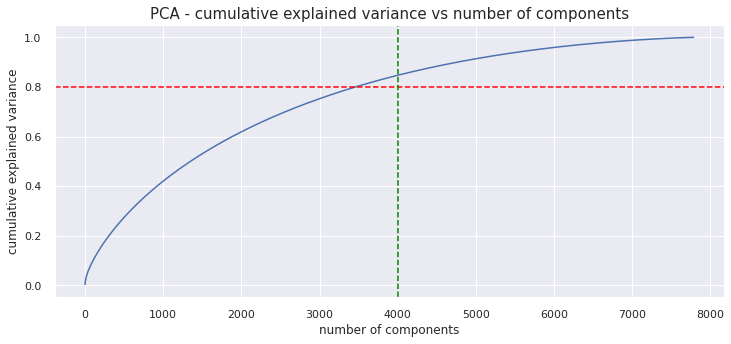

In [78]:
# Explained variance for different number of components
plt.figure(figsize=(12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components',fontsize=15)
plt.xlabel('number of components',fontsize=12)
plt.ylabel('cumulative explained variance',fontsize=12)
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 4000, color='green', linestyle='--')
plt.show()

In [79]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=40)
pca.fit(X)

PCA(n_components=4000, random_state=40)

In [80]:
# transformed features
x_pca = pca.transform(X)

In [81]:
# shape of transformed vectors
x_pca.shape


(7787, 4000)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while preserving as much information as possible. It is a common step in machine learning and data analysis, as high-dimensional datasets can be difficult to work with and can sometimes suffer from the curse of dimensionality.

## ***7. ML Model Implementation***

What is model in machine learning:-

* A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.

While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms.

### ML Model - 1
###K-Means Clustering

Text(0, 0.5, 'WCSS')

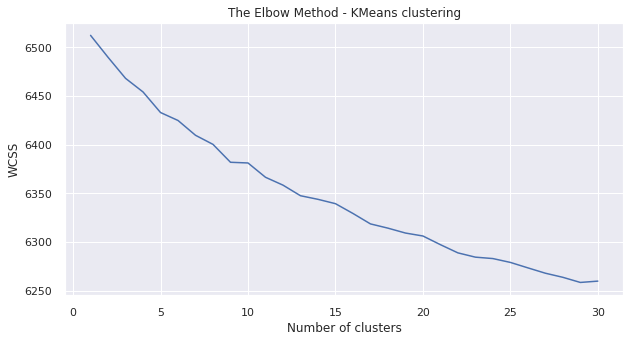

In [82]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
     


In [86]:
# Plotting Silhouette score for different number of clusters

range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

KeyboardInterrupt: ignored

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


KeyboardInterrupt: ignored

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


KeyboardInterrupt: ignored

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=40)
kmeans.fit(x_pca)
     

In [ ]:
# Adding a kmeans cluster number attribute
df1['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***